## 이상치
- 결측치, 범위에서 크게 벗어나는 데이터
- 분석 모델의 성능을 떨어뜨리거나 결과에 악영향을 미치는 경우 발생
- 이상치를 발견하면 확인 작업 후 특정한 값으로 대체, 삭제
- 극단치 -> IQR 방식
	- matplotlib에서 boxplot 함수를 이용해 극단치 확인
	- Q3(3사분위수)와 Q1(1사분위수)를 이용해 범위 지정
	- IQR = Q3 - Q1
	- 극단치의 경계 (Q3 + 1.5 * IQR), (Q1 - 1.5 * IQR)
	- 해당 경계값을 loc를 이용하여 확인
	- 1.5 값을 조절하여 극단치 범위 변경

In [1]:
# 사이킷런 라이브러리 설치
# !pip install scikit-learn

In [2]:
# 사용할 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [3]:
# 데이터셋 로드
# load_wine() : Bunch 객체 -> 딕셔너리 형태 -> key로 데이터 접근 가능
wine_load = load_wine()

In [4]:
wine_load

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
# 불러온 데이터셋(딕셔너리 형태)의 구성 요소 키 확인
wine_load.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

| 키 이름            | 설명                             |
| --------------- | ------------------------------ |
| `data`          | 와인의 특성(피처) 값들 (2차원 배열)         |
| `target`        | 와인의 분류 레이블 (0, 1, 2)           |
| `feature_names` | 각 특성의 이름                       |
| `target_names`  | 레이블 이름 (클래스명)                  |
| `DESCR`         | 데이터셋 설명 텍스트                    |
| `frame`         | (옵션) `pandas.DataFrame` 형식 데이터 |
| `filename`      | 로컬 파일 경로                       |


In [6]:
# data, feature_names를 이용해 데이터프레임 생성
wine = pd.DataFrame( wine_load['data'], columns=wine_load['feature_names'])

In [7]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
# 종속변수인 target 데이터를 wine 데이터프레임에 'class' 컬럼 추가
wine['class'] = wine_load['target']

In [9]:
wine_load['target_names']
# wine_load.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


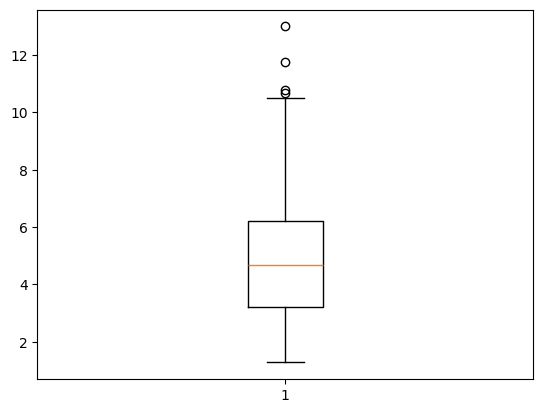

In [11]:
# color_intensity 데이터에 극단치가 존재하는가?
# boxplot을 이용해 확인
plt.boxplot(wine['color_intensity'])
plt.show()

In [12]:
wine[['color_intensity']].describe()

,color_intensity
count,178.000000
mean,5.058090
std,2.318286
min,1.280000
25%,3.220000
50%,4.690000
75%,6.200000
max,13.000000


#### 사분위수 구하기
- describe()['25%'] : 요약 통계에서 1사분위수 추출
- quantile(0.25) : 직접 1사분위수 계산
- np.percentile(..., [25, 75]) : Q1, Q3를 한 번에 계산
	- 리스트 형태로 여러 분위수 계산 가능

In [13]:
# 데이터의 하위 25% 지점 값 확인
print(wine['color_intensity'].describe()['25%'])
print(wine['color_intensity'].quantile(0.25))

3.2199999999999998
3.2199999999999998


In [14]:
# numpy 라이브러리를 이용해 1사분위, 3사분위 수 저장, 출력
q_1, q_3 = np.percentile(wine['color_intensity'], [25, 75])
print('1사분위수는', q_1)
print('3사분위수는', q_3)

1사분위수는 3.2199999999999998
3사분위수는 6.2


In [15]:
iqr = q_3 - q_1						# IQR = Q3(3사분위수) - Q1(1사분위수)
upper_whis = q_3 + (1.5 * iqr)		# 이상치 상한 기중
lower_whis = q_1 - (1.5 * iqr)		# 이상치 하한 기준
print(upper_whis, lower_whis)

10.670000000000002 -1.2500000000000009


In [16]:
# color_intensity의 값이 극단치 기준을 벗어나는지 여부 -> True / False
flag = (wine['color_intensity'] > upper_whis) | (wine['color_intensity'] < lower_whis)
flag.value_counts()

color_intensity
False    174
True       4
Name: count, dtype: int64

In [17]:
# 극단치로 판단된 행(flag가 True) 확인
wine.loc[flag, ]		# 데이터프레임

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695.0,2


In [18]:
# 극단치 비율(확률)
len(wine.loc[flag, ]) / len(wine)

0.02247191011235955

### iqr을 이용해 극단치를 판단하는 함수
- 매개변수 3개
	- _df : 데이터프레임
	- _cols : 극단치를 판단하려고 하는 컬럼의 이름(가변)
	- _num : 신뢰구간 범위를 지정하는 수(기본값 1.5)
- _cols 의 개수만큼 반복 실행
	- 컬럼의 데이터를 기준으로 1사분위수, 3사분위수 생성
	- 1사분위수와 3사분위수 이용해 iqr 생성
	- 1사분위수, 3사분위수, iqr을 이용해 극단치의 경계(상한, 하한) 생성
	- 데이터프레임에서 극단치의 경계를 이용해 조건을 만족하는 극단치 데이터 추출
	- 추출한 데이터프레임을 비어있는 딕셔너리에 저장
		- key값은 컬럼명, value값은 극단치 데이터 DataFrame
	- 결과 딕셔너리 반환

In [19]:
def outlier_iqr(_df, *_cols, _num = 1.5):
    # 빈 딕셔너리 생성 -> 함수의 결과를 저장할 공간
    result = dict()
    # _cols를 기준으로 반복 실행
    for col in _cols:
        # col의 데이터에서 1사분위수, 3사분위수 계산해 변수에 저장
        q_1, q_3 = np.percentile(_df[col], [25, 75])
        # iqr 생성
        iqr = q_3 - q_1
        # 상단 경계, 하단 경계 생성
        upper_whis = q_3 + 1.5 * iqr
        lower_whis = q_1 - 1.5 * iqr
        print(f'''
				{col} 컬럼의 데이터에서
                상단의 극단치 경계값은 {upper_whis}이고,
                하단의 극단치 경계값은 {lower_whis}입니다.
              ''')
        # 극단치 조건식 생성
        flag = (_df[col] > upper_whis) | (_df[col] < lower_whis)
        # 극단치 값 확인
        outlier = _df.loc[flag, ]
        # 딕셔너리에 극단치 데이터 저장 -> 컬럼명을 key로, 극단치 df(outlier)를 value로
        result[col] = outlier
    return result

In [20]:
cols = list(wine.columns[:3, ])

In [21]:
# outlier_iqr(wine, cols)
# 함수의 가변 인자값에 리스트 형태의 데이터 들어가면 오류

In [22]:
# wine과 cols를 이용해 함수에 입력값으로 대입
# cols가 리스트 형태 -> 가변 매개변수인 _cols에 대입하려면?
outliers = outlier_iqr(wine, *cols)


				alcohol 컬럼의 데이터에서
                상단의 극단치 경계값은 15.650000000000002이고,
                하단의 극단치 경계값은 10.389999999999997입니다.
              

				malic_acid 컬럼의 데이터에서
                상단의 극단치 경계값은 5.3025이고,
                하단의 극단치 경계값은 -0.6174999999999997입니다.
              

				ash 컬럼의 데이터에서
                상단의 극단치 경계값은 3.0787500000000003이고,
                하단의 극단치 경계값은 1.6887499999999998입니다.
              


In [23]:
# outliers(함수의 결과값) -> 딕셔너리
type(outliers)

dict

In [24]:
# outliers의 특정 컬럼(key값)의 극단치 데이터 -> 데이터프레임
type(outliers['alcohol'])

pandas.core.frame.DataFrame

In [25]:
outliers['alcohol']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class


In [26]:
outliers['malic_acid']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0,1
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2


In [27]:
outliers['ash']

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1


### 극단치의 정제
1. 극단치를 제거
	- 데이터의 개수가 매우 많고 극단치 데이터의 개수가 전체 데이터에 비해 매우 적은 경우 제거
	- 극단치 제거 -> 데이터 개수 감소
2. 극단치를 특정 데이터로 대체
	- 극단치의 값들을 다른 값으로 대체 (중앙값, 평균값, 모델 기반 예측값 등)
	- 데이터분석가에 따라 대체할 값의 차이 발생

In [28]:
df = wine.copy()

In [29]:
# 극단치 제거 -> ash 컬럼에서 극단치 제거
# drop() -> 조건에 따라 행을 제거할것인가 열을 제거할것인가 지정
	# 조건 -> outliers['ash']의 인덱스의 값
	# 해당 인덱스의 행 제거 -> axis=0
df.drop(outliers['ash'].index, axis=0, inplace=True)

In [30]:
print(f'원본 데이터의 개수 : {len(wine)}')
print(f'극단치가 제거된 데이터의 개수 : {len(df)}')

원본 데이터의 개수 : 178
극단치가 제거된 데이터의 개수 : 175


In [31]:
# 상단경계보다 높은 극단치의 데이터를 극단치를 제외한 max값으로 대체
# 하단경계보다 낮은 극단치의 데이터를 극단치를 제외한 min값으로 대체
max_value = df['ash'].max()		# 극단치 제거 후 최대값
min_value = df['ash'].min()		# 극단치 제거 후 최소값

In [32]:
print(max_value, min_value)

2.92 1.7


In [33]:
# 중앙값 확인
# df['ash'].median()
center_value = np.percentile(df['ash'], 50)
center_value

np.float64(2.36)

In [34]:
df2 = wine.copy()

- 상단 극단치 대체

In [35]:
# 'ash' 컬럼의 극단치 데이터 중 중앙값보다 큰 극단치인지 여부 
outliers['ash']['ash'] > center_value

25      True
59     False
121     True
Name: ash, dtype: bool

In [36]:
# 상단경계보다 높은 극단치의 데이터를 극단치를 제외한 max 값으로 대체
# 조건 -> outliers['ash']에서 center_value보다 큰 데이터의 index
flag = outliers['ash']['ash'] > center_value

In [37]:
flag_index = []
for i in flag.index:
    # print(flag[i])
    if flag[i]:
        # print(i)
        flag_index.append(i)
flag_index

[25, 121]

In [38]:
df2.loc[flag_index, 'ash'] = max_value

In [39]:
# max_value 값으로 대체된 후 ash 컬럼의 값 확인
df2.loc[flag.index, 'ash']

25     2.92
59     1.36
121    2.92
Name: ash, dtype: float64

- 하단 극단치 대체

In [40]:
# 하단 극단치의 인덱스를 수집 
# flag 조건이 False인 인덱스 (outliers['ash']에서 center_value보다 작은 데이터의 index)
flag_index = []
for i in flag.index:
    if ~flag[i]:
        flag_index.append(i)

In [41]:
flag_index

[59]

In [42]:
# 하단 극단치 -> min_value로 대체
df2.loc[flag_index, 'ash'] = min_value

In [43]:
df2['ash'].describe()

count    178.000000
mean       2.365000
std        0.259195
min        1.700000
25%        2.210000
50%        2.360000
75%        2.557500
max        2.920000
Name: ash, dtype: float64

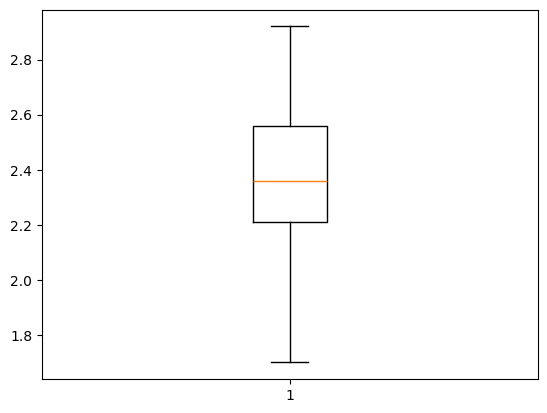

In [44]:
plt.boxplot(df2['ash'])
plt.show()

In [45]:
df3 = wine.copy()

In [46]:
df3['ash'].describe()

count    178.000000
mean       2.366517
std        0.274344
min        1.360000
25%        2.210000
50%        2.360000
75%        2.557500
max        3.230000
Name: ash, dtype: float64

In [47]:
# max_value보다 크다면 -> 상단 극단치 경계보다 높은 데이터 
flag = df3['ash'] > max_value
df3.loc[flag, 'ash'] = max_value

In [48]:
flag = df3['ash'] < min_value
df3.loc[flag, 'ash'] = min_value

In [49]:
df3['ash'].describe()

count    178.000000
mean       2.365000
std        0.259195
min        1.700000
25%        2.210000
50%        2.360000
75%        2.557500
max        2.920000
Name: ash, dtype: float64

In [50]:
df4 = wine.copy()

In [51]:
# replace 함수 이용
flag = outliers['ash']['ash'] > center_value

In [52]:
upper_data = outliers['ash'].loc[flag, 'ash']

In [53]:
for i in upper_data:
    # print(i)
    df4['ash'].replace(i, max_value, inplace=True)

C:\Users\toqha\AppData\Local\Temp\ipykernel_19488\2235018250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['ash'].replace(i, max_value, inplace=True)


In [54]:
lower_data = outliers['ash'].loc[~flag, 'ash']
for i in lower_data:
    df4['ash'].replace(i, min_value, inplace=True)

C:\Users\toqha\AppData\Local\Temp\ipykernel_19488\2827600498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4['ash'].replace(i, min_value, inplace=True)


In [55]:
df4['ash'].describe()

count    178.000000
mean       2.365000
std        0.259195
min        1.700000
25%        2.210000
50%        2.360000
75%        2.557500
max        2.920000
Name: ash, dtype: float64

### 범주형 변수 처리
- 수학적 연산으로 예측하는 모델이 대부분이기 때문에 범주형 변수를 직접적으로 사용하기 어려움
	- 수치형 변수로 변환하는 전처리 과정 필요
	- 더미 변수를 생성해 모델 학습
	- 원핫인코딩: 범주형 데이터들을 컬럼으로 생성하여 0과 1로 데이터를 대입해 포함 여부를 만듦
	- (ex) 'a' 변수에 (빨강, 파랑, 초록) -> 세 컬럼 'a_빨강', 'a_파랑', 'a_초록' 생성

In [56]:
# wine 데이터프레임에서 class 컬럼의 데이터들을 target_names로 변경
wine_load['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#### 특정 컬럼의 데이터 값 변경
| 방법                        | 설명             | 코드 예시                                                                                                                                      |
| ------------------------- | -------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **1. 조건 필터 + 대입**         | 특정 값만 직접 변경    | `python<br>flag = wine['class'] == 0<br>wine.loc[flag, 'class'] = 'class_0'`                                                               |
| **2. `map()` + 딕셔너리**     | 숫자 → 문자열 매핑    | `python<br>wine['class'] = wine['class'].map({<br>    0: 'class_0', 1: 'class_1', 2: 'class_2'<br>})`                                      |
| **3. `map()` + `lambda`** | 조건문 포함한 유연한 변환 | `python<br>wine['class'] = wine['class'].map(<br>    lambda x: 'class_1' if x==1 else (<br>        'class_2' if x==2 else 'class_0'<br>))` |


In [106]:
# wine 데이터프레임의 'class' 컬럼 값이 0인 행을 찾아 값을 'class_0'으로 변경
flag = wine['class'] == 0
wine.loc[flag, 'class'] = 'class_0'

In [58]:
wine['class'].value_counts()

class
1          71
class_0    59
2          48
Name: count, dtype: int64

In [59]:
# map() 함수 이용 -> 
wine['class'].map(
    {
        'class_0' : 'class_0',
        1 : 'class_1',
        2 : 'class_2'
	}
)

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: class, Length: 178, dtype: object

In [ ]:
# lambda 사용
# if문 한 줄로 표현 -> '참인경우데이터' if 조건식 '거짓인경우데이터' else 조건식
wine['class'] = wine['class'].map(
    lambda x : 'class_1' if x==1 else (
        'class_2' if x==2 else 'class_0'
	)
)

In [108]:
wine['class'].value_counts()

class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [62]:
len(wine.columns)

14

- get_dummies() 함수 이용
	- 범주형 데이터 -> 더미변수 생성

In [63]:
# 범주형 데이터를 더미변수로 생성
# get_dummies() 함수 이용 -> 판다스에 존재
wine_dummy = pd.get_dummies(
    wine,
    columns=['class']    
)

In [64]:
len(wine_dummy.columns)

16

In [65]:
wine_dummy['class_class_1'].sum()

np.int64(71)

### 데이터의 분할
- 분석 모델을 학습하고 성과 확인을 위해 데이터를 train, test 데이터로 나누고 독립변수, 종속변수로 분리하는 작업
- train, test 비율은 일반적으로 70:30
- sklearn 라이브러리에서 train_test_split() 함수 사용
	- train_test_split(X, Y, test_size = None, random_state = None, shuffle = True, stratify = None)
		- X : 독립변수 데이터
		- Y : 종속변수 데이터
		- test_size : 테스트 데이터의 비율(0~1)
		- random_state : 임의의 번호 지정. 같은 데이터에서 같은 번호 입력시 같은 데이터 확인 가능
		- shuffle : True라면 데이터를 나누기 전에 섞어줌
		- stratify : None이 아닌 경우 데이터는 지정한 변수(특정 컬럼의 데이터)를 기준으로 계층화되어 해당 변수의 비율을 유지하도록 추출

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [67]:
iris_load = load_iris()

In [68]:
iris_load['frame']

In [69]:
iris = pd.DataFrame(iris_load['data'],
                    columns=iris_load['feature_names'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
iris_load['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
iris_load['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
iris['class'] = iris_load['target']

In [73]:
iris['class'] = iris['class'].map(
    {
        0 : 'setosa',
        1 : 'versicolor',
        2 : 'vurginica'
	}
)

In [74]:
iris['class'].value_counts()

class
setosa        50
versicolor    50
vurginica     50
Name: count, dtype: int64

In [75]:
# train, test로 데이터를 분할
x_train, x_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1),		# 독립변수
    iris['class'],					# 종속변수
    test_size=0.3,
    random_state=42
)

In [76]:
print(f'학습 데이터 수 : {len(x_train)}, 테스트 데이터 수 : {len(x_test)}')

학습 데이터 수 : 105, 테스트 데이터 수 : 45


In [77]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [78]:
# 종속변수의 데이터 개수
y_train.value_counts()

class
versicolor    37
vurginica     37
setosa        31
Name: count, dtype: int64

In [79]:
# iris 데이터에서 class 값들의 비율은 동일하게 데이터를 나눠준다
# stratify 속성 사용
x_train, x_test, y_train, y_test = train_test_split(
    iris.drop('class', axis=1),
    iris['class'],
    test_size=0.3,
    random_state=42,
    stratify=iris['class'],
    shuffle = True
)

In [80]:
y_train.value_counts()

class
versicolor    35
setosa        35
vurginica     35
Name: count, dtype: int64

In [81]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
107,7.3,2.9,6.3,1.8
63,6.1,2.9,4.7,1.4
133,6.3,2.8,5.1,1.5
56,6.3,3.3,4.7,1.6
127,6.1,3.0,4.9,1.8
140,6.7,3.1,5.6,2.4
53,5.5,2.3,4.0,1.3
69,5.6,2.5,3.9,1.1
20,5.4,3.4,1.7,0.2
141,6.9,3.1,5.1,2.3


### 데이터의 불균형 문제 처리
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확하게 분류하는 것이 중요
- 보통 이상 데이터가 tarfet으로 사용하는 경우가 많다
- 데이터가 불균형할 떄는 분류의 성능과 tarfet 데이터를 정확하게 분류해내는 목표가 일치하지 않는 경우가 많다
- 분석 결과 해석뿐 아니라 머신러닝 모델에서의 문제 발생 가능
- 소수의 데이터인 target의 중요도를 낮게 판단해 분석 가능한 모델이 생성되지X
- 소수의 데이터를 늘려주는 방법 -> 오버샘플링
- 상대적으로 많은 데이터에서 일부만 사용하는 방법 -> 언더샘플링 

In [82]:
# 라이브러리 설치
# !pip install imbalanced-learn

### 언더샘플링
- 다수의 라벨을 가진 데이터를 샘플링해 소수의 데이터셋의 라벨의 수 기준으로 감소시키는 방법
- 이 기법은 데이터 불균형 문제의 해결 가능하지만, 데이터 개수가 줄어들어서 학습 성능 저하 가능

In [83]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [84]:
# 랜덤 데이터셋 생성
# 90 : 10 비율 데이터 생성
x, y = make_classification(
    n_samples=2000,
    n_features=5,
    weights=[0.9],
    flip_y=0
)

In [85]:
x

array([[ 1.70698067, -1.59628029, -1.84236319,  2.8664341 ,  2.9925634 ],
       [ 0.16819371,  0.75652598,  0.67940628, -1.0468708 , -1.08058492],
       [-0.65868411, -1.06612558, -0.19748145,  0.2529686 ,  0.19825062],
       ...,
       [ 0.14286624, -2.22495105,  1.56140427, -2.64629534, -3.02596643],
       [-0.11317741,  2.2642763 ,  1.74187447, -2.66429526, -2.72597804],
       [ 0.06925679, -0.0602809 ,  0.07949391, -0.13151356, -0.14680286]])

In [86]:
Counter(y)

Counter({np.int64(0): 1801, np.int64(1): 199})

In [87]:
# 랜덤 언더샘플링이라는 class 생성
undersample = RandomUnderSampler()

In [88]:
# fit_resample()
x_under, y_under = undersample.fit_resample(x, y)

In [89]:
Counter(y_under)

Counter({np.int64(0): 199, np.int64(1): 199})

In [90]:
# class 생성시 인자의 값 대입
# sampling_strategy : 소수의 데이터의 비율을 지정하여 다수의 데이터 개수 정해줌
undersample2 = RandomUnderSampler(
    sampling_strategy=0.5		# 소수 데이터의 비율
)

In [91]:
x_under2, y_under2 = undersample2.fit_resample(x, y)
Counter(y_under2)

Counter({np.int64(0): 398, np.int64(1): 199})

### 오버샘플링
- 소수의 데이터를 다수의 데이터 개수만큼 증식시켜 학습에 사용하기 위한 방법
- 데이터 손실이 없어 일반적으로 언더샘플링에 비해 유리하기 때문에 사용

### 랜덤 오버샘플링
- 소수의 데이터를 단순 복제하여 다수의 데이터 개수와 비율을 맞춰줌
- 

In [92]:
from imblearn.over_sampling import RandomOverSampler

In [93]:
oversample = RandomOverSampler()

In [94]:
x_over, y_over = oversample.fit_resample(x, y)

In [95]:
Counter(y_over)

Counter({np.int64(1): 1801, np.int64(0): 1801})

In [96]:
oversample2 = RandomOverSampler(
    sampling_strategy=0.5
)

In [97]:
x_over2, y_over2 = oversample2.fit_resample(x, y)
Counter(y_over2)

Counter({np.int64(0): 1801, np.int64(1): 900})

### SMOTE
- 소수의 데이터 관측값에 대한 K개의 최근접 이웃을 찾고 관측값과 이웃으로 선택된 값 사이에 임의의 데이터 생성

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
smote_sample = SMOTE()

In [100]:
x_sm, y_sm = smote_sample.fit_resample(x, y)

In [101]:
Counter(y_sm)

Counter({np.int64(1): 1801, np.int64(0): 1801})

In [102]:
# 언더샘플링, 오버샘플링 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
x

array([[ 1.70698067, -1.59628029, -1.84236319,  2.8664341 ,  2.9925634 ],
       [ 0.16819371,  0.75652598,  0.67940628, -1.0468708 , -1.08058492],
       [-0.65868411, -1.06612558, -0.19748145,  0.2529686 ,  0.19825062],
       ...,
       [ 0.14286624, -2.22495105,  1.56140427, -2.64629534, -3.02596643],
       [-0.11317741,  2.2642763 ,  1.74187447, -2.66429526, -2.72597804],
       [ 0.06925679, -0.0602809 ,  0.07949391, -0.13151356, -0.14680286]])

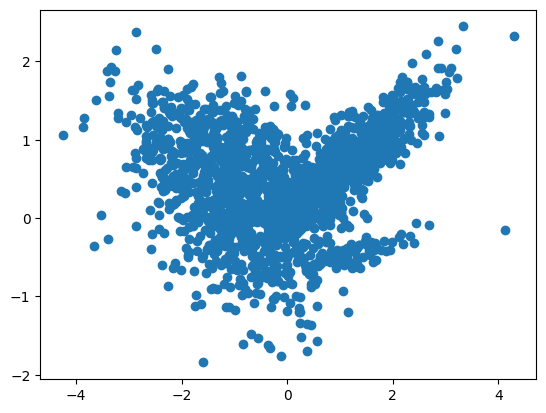

In [104]:
plt.scatter(x[:, 1], x[:, 2])
plt.show()

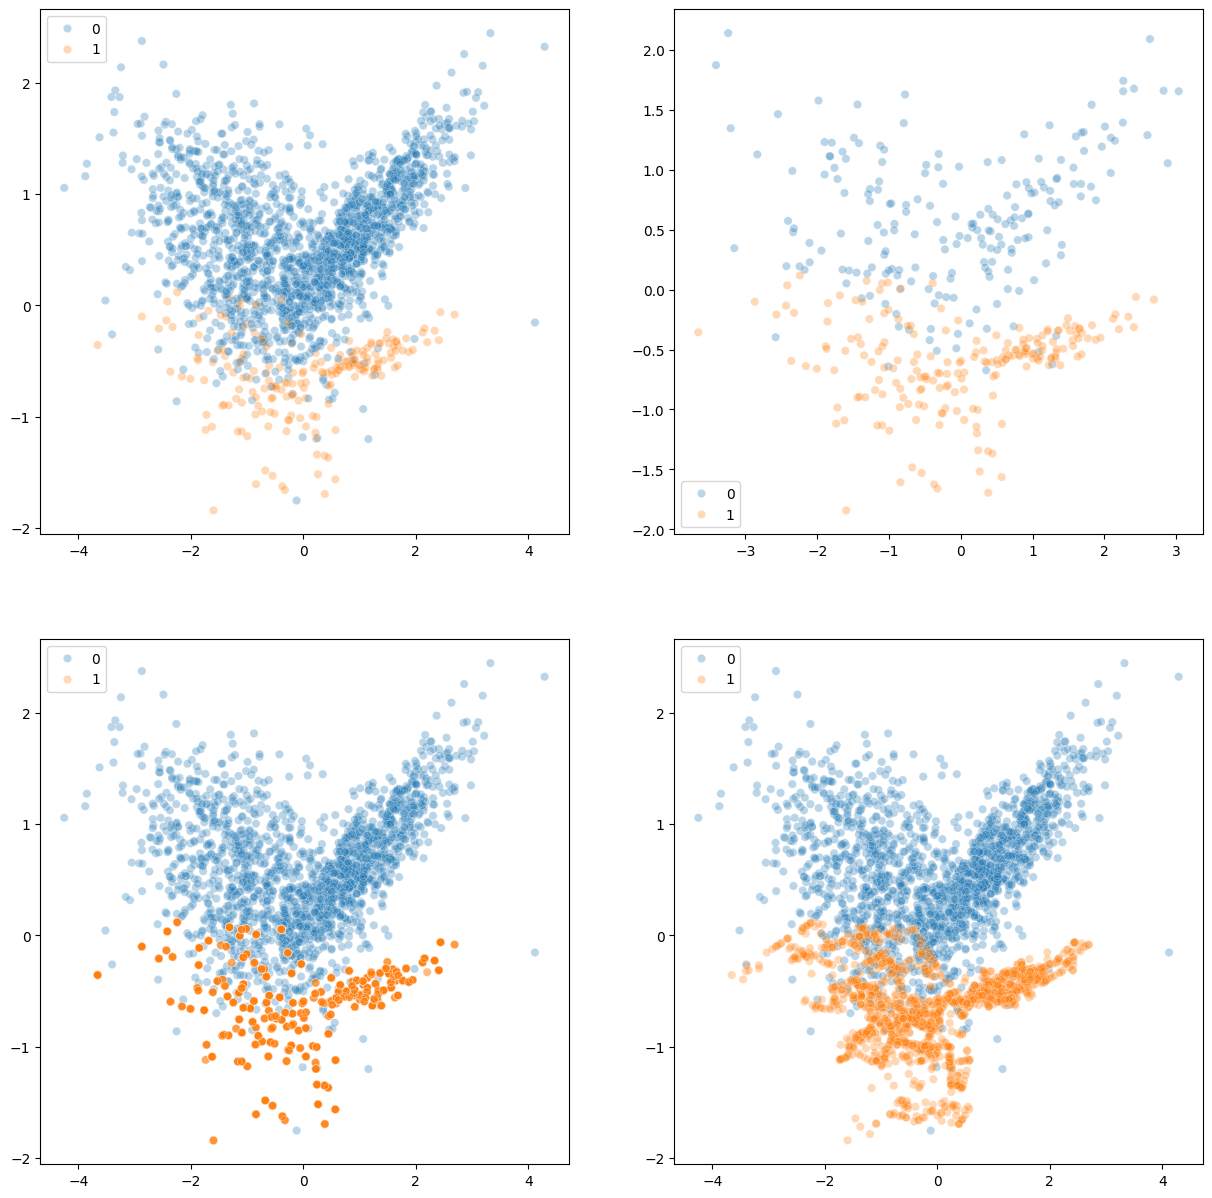

In [105]:
# subplot -> 하나의 공간에 여러개의 그래프를 그리는 방법
# seaborn 라이브러리를 이용해 그래프를 여러개 그린다

# 서브 플롯을 이용해 공간을 나눈다
flag, axes = plt.subplots( nrows = 2, ncols = 2, figsize = (15, 15) )

sns.scatterplot(x = x[:, 1], y = x[:, 2], ax = axes[0][0], hue=y, alpha=0.3)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], ax = axes[0][1], hue=y_under, alpha=0.3)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], ax = axes[1][0], hue=y_over, alpha=0.3)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], ax=axes[1][1], hue=y_sm, alpha=0.3)

plt.show()
